 --Printing trows-- 
        country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  
--cleanup the data--
.. Data Types of the columns
existing data types..
 country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: obj

NameError: name 'Ridge' is not defined

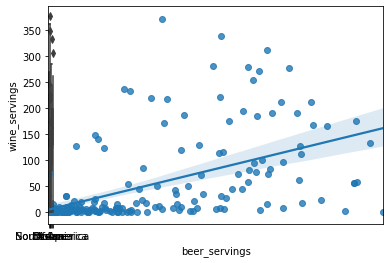

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc_context

from sklearn.linear_model import LinearRegression

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv"

#headers = ["country", "beer_servings", "spirit_servings","wine_servings","total_litres_of_pure_alcohol","continent"]

df = pd.read_csv(filename)
print(" --Printing trows-- \n", df.head())

print("--cleanup the data--")

print(".. Data Types of the columns")
print("existing data types..\n", df.dtypes)
print(".. change data types for beer, wine servings to int and total alcohol to float")
df[["beer_servings",
"spirit_servings",
"wine_servings"]] = df[["beer_servings",
"spirit_servings",
"wine_servings"]].astype("int")
df[["total_litres_of_pure_alcohol"]] = df[["total_litres_of_pure_alcohol"]].astype("float")
df[["beer_servings"]] = df[["beer_servings"]].astype("int")
print("After reformatting of data types \n", df.dtypes)
print("--")

df_group_continent = df.groupby('continent')['wine_servings'].sum()

sns.boxplot(x="continent", y="beer_servings", data=df)

sns.regplot(x="beer_servings", y="wine_servings", data=df)

lr= LinearRegression()
#independent var
x_axis = df[['wine_servings']]
#dependent var
y_axis = df[['total_litres_of_pure_alcohol']]
lr.fit(x_axis, y_axis)
r_squared = lr.score(x_axis, y_axis)
print(" -R^2 - coefficient of determination/fit= ", r_squared)

from sklearn.model_selection import train_test_split


x_data = df[['beer_servings','spirit_servings', 'wine_servings']]
y_data = df[['total_litres_of_pure_alcohol']]
# Now we randomly split our data into training and testing data using the function train_test_split.
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)


print("number of test samples :", x_test_1.shape[0])
print("number of training samples:",x_train_1.shape[0])

lr = LinearRegression()
lr.fit(x_train_1, y_train_1)
r_squared_train = lr.score(x_train_1, y_train_1)
r_squared_test = lr.score(x_test_1,y_test_1)
print(" -R^2 - Test Data= ", r_squared_test)
print(" -R^2 - Train Data= ", r_squared_train)
print("--")

from sklearn.preprocessing import PolynomialFeatures

poly_2nd=PolynomialFeatures(degree=2)
x_train_poly_2nd=poly_2nd.fit_transform(x_train_1)
x_test_poly_2nd=poly_2nd.fit_transform(x_test_1)
ridge= Ridge(alpha=0.1)
ridge.fit(x_train_poly_2nd, y_train_1)
print(" -R^2 - Ridged test Data with alpha=0.1= ",ridge.score(x_test_poly_2nd,y_test_1))

